# Data Exploration

This notebook explores the datasets to understand:
- Data distributions
- Missing values
- Relationships between variables
- Historical yield patterns


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
data_dir = Path("../raw_datasets")
output_dir = Path("../models")
output_dir.mkdir(exist_ok=True)

# Load datasets
print("Loading datasets...")
climate_df = pd.read_csv(data_dir / "climate_data.csv")
crop_climate_req = pd.read_csv(data_dir / "crop_climate_requirements.csv")
crop_requirements = pd.read_csv(data_dir / "crop_requirements.csv")
crop_npk_req = pd.read_csv(data_dir / "crop_npk_level_requirements.csv")
historical_perf = pd.read_csv(data_dir / "historical_crop_performance.csv")
soil_test_df = pd.read_csv(data_dir / "soil_test_data.csv")
pesticide_df = pd.read_csv(data_dir / "pesticideV2.csv")

print(f"Climate data: {len(climate_df)} records")
print(f"Crop climate requirements: {len(crop_climate_req)} crops")
print(f"Crop requirements: {len(crop_requirements)} crops")
print(f"NPK requirements: {len(crop_npk_req)} crops")
print(f"Historical performance: {len(historical_perf)} records")
print(f"Soil test data: {len(soil_test_df)} records")


Loading datasets...
Climate data: 215556 records
Crop climate requirements: 104 crops
Crop requirements: 104 crops
NPK requirements: 104 crops
Historical performance: 93369 records
Soil test data: 22242 records


In [69]:
print(pesticide_df.head(3))

                    NAME OF COMPANY   ACTIVE INGREDIENT  \
0  AGCHEM MANUFACTURING CORPORATION   BISPYRIBAC SODIUM   
1      118 AGRICULTURAL CORPORATION  LAMBDA-CYHALOTHRIN   
2      118 AGRICULTURAL CORPORATION  LAMBDA-CYHALOTHRIN   

            PRODUCT NAME CONCENTRATION FORMULATION TYPE        USE/S  \
0            ZYTOX 10 SC       100 g/L               SC    HERBICIDE   
1  ZULPAC -LAMBDA 2.5 EC        25 g/L               EC  INSECTICIDE   
2   ZULPAC LAMBDA 2.5 EC        25 g/L               EC  INSECTICIDE   

  TOXICITY CATEGORY REGISTRATION NO. EXPIRY DATE               MODE OF ENTRY  \
0                 2     001-276-3588   23-Oct-24  Selective (Post-Emergence)   
1                 2     506-204-2908   16-May-27                    Systemic   
2                 2     506-204-2908   16-May-27                    Systemic   

                          CROPS  \
0  Rice (Direct-Seeded lowland)   
1                         Cacao   
2                          Rice   

            

In [63]:
print(crop_npk_req.head(10))

                         crop                category n_requirement  \
0  Alugbati (Malabar spinach)       Vegetable - Leafy          high   
1     Ampalaya (Bitter gourd)    Vegetable - Cucurbit        medium   
2          Atis (Sugar apple)        Fruit - Tropical        medium   
3                     Avocado        Fruit - Tropical        medium   
4       Balimbing (Starfruit)        Fruit - Tropical        medium   
5             Saging (Banana)      Fruit - Commercial          high   
6            Basiliko (Basil)            Herb & Spice          high   
7                       Beets  Vegetable - Root/Tuber        medium   
8                 Black beans      Vegetable - Legume           low   
9          Rimas (Breadfruit)        Fruit - Tropical        medium   

  p_requirement k_requirement  \
0        medium        medium   
1        medium          high   
2          high          high   
3          high          high   
4          high          high   
5        medium     

In [61]:
crop_climate_req.head(10)

,Crop_Name,Temp_Min_C,Temp_Max_C,Rainfall_Min_mm,Rainfall_Max_mm,Humidity_Min_Percent,Humidity_Max_Percent
0,Alugbati (Malabar spinach),18,35,750,2000,60,90
1,Ampalaya (Bitter gourd),18,35,750,2000,60,90
2,Atis (Sugar apple),15,32,600,2500,60,95
3,Avocado,15,30,600,2000,60,90
4,Balimbing (Starfruit),15,32,600,2500,60,95
5,Saging (Banana),20,35,1000,2500,70,95
6,Basiliko (Basil),10,30,500,2000,50,90
7,Beets,5,25,400,1500,50,85
8,Black beans,10,32,450,2000,50,90
9,Rimas (Breadfruit),15,32,600,2500,60,95


In [60]:
print(crop_requirements.head(10))

                         Crop          Category Soil pH Range  \
0  Alugbati (Malabar spinach)        Vegetables       6.0-7.0   
1     Ampalaya (Bitter gourd)  Fruit Vegetables       6.0-6.7   
2          Atis (Sugar apple)       Fruit Trees       5.5-6.5   
3                     Avocado       Fruit Trees       6.0-8.0   
4       Balimbing (Starfruit)       Fruit Trees       5.5-6.5   
5             Saging (Banana)            Fruits       6.0-7.5   
6            Basiliko (Basil)        Vegetables       5.5-6.5   
7                       Beets        Root Crops       6.5-7.0   
8                 Black beans        Vegetables       6.0-7.0   
9          Rimas (Breadfruit)       Fruit Trees       6.1-7.4   

                     Soil Type Planting Period Days to Harvest  \
0  Sandy loam, Loam, Clay loam      All season       30-45 DAH   
1        Sandy loam, Clay loam      All season       60-75 DAP   
2             Sandy loam, Loam         Jun-Sep       60-90 DAH   
3        Sandy loam,

In [54]:
print(historical_perf[historical_perf['Province'].str.upper() == 'MISAMIS ORIENTAL'].head(10))

                           Crop          Province  Year  Volume_Production  \
567  Alugbati (Malabar spinach)  Misamis Oriental  2010            1599.57   
568  Alugbati (Malabar spinach)  Misamis Oriental  2011            1623.00   
569  Alugbati (Malabar spinach)  Misamis Oriental  2012            1634.00   
570  Alugbati (Malabar spinach)  Misamis Oriental  2013            1643.00   
571  Alugbati (Malabar spinach)  Misamis Oriental  2014            1655.00   
572  Alugbati (Malabar spinach)  Misamis Oriental  2015            1625.00   
573  Alugbati (Malabar spinach)  Misamis Oriental  2016            1655.00   
574  Alugbati (Malabar spinach)  Misamis Oriental  2017            1665.00   
575  Alugbati (Malabar spinach)  Misamis Oriental  2018            1675.00   
576  Alugbati (Malabar spinach)  Misamis Oriental  2019            1679.50   

     Area_Planted_Harvested  
567                   125.0  
568                   126.0  
569                   128.0  
570                  

In [55]:
print(soil_test_df[soil_test_df['province'].str.upper() == 'MISAMIS ORIENTAL'].head(10))

               province municipality    farmer nitrogen phosphorus potassium  \
14864  MISAMIS ORIENTAL     ALUBIJID  Farmer 1   Medium     Medium      High   
14865  MISAMIS ORIENTAL     ALUBIJID  Farmer 2   Medium       High    Medium   
14866  MISAMIS ORIENTAL     ALUBIJID  Farmer 3   Medium     Medium      High   
14867  MISAMIS ORIENTAL     ALUBIJID  Farmer 4   Medium       High    Medium   
14868  MISAMIS ORIENTAL     ALUBIJID  Farmer 5      Low       High    Medium   
14869  MISAMIS ORIENTAL     ALUBIJID  Farmer 6   Medium       High    Medium   
14870  MISAMIS ORIENTAL   BALINGASAG  Farmer 1      Low        Low       Low   
14871  MISAMIS ORIENTAL   BALINGASAG  Farmer 2   Medium        Low       Low   
14872  MISAMIS ORIENTAL   BALINGASAG  Farmer 3   Medium     Medium    Medium   
14873  MISAMIS ORIENTAL   BALINGASAG  Farmer 4   Medium     Medium    Medium   

       ph_min  ph_max  
14864     4.5     5.5  
14865     4.5     5.5  
14866     6.5     8.0  
14867     4.5     5.5  

In [21]:
for param, group in climate_df.groupby('PARAMETER'):
    print(f"--- {param} ---")
    print(group.head(5))
    print()

--- PRECTOTCORR_SUM ---
  Province Municipality        PARAMETER  YEAR    JAN    FEB   MAR    APR  \
0     Abra      Bangued  PRECTOTCORR_SUM  1981  21.63   1.77  5.77  34.52   
1     Abra      Bangued  PRECTOTCORR_SUM  1982  14.01   6.43  0.31   9.17   
2     Abra      Bangued  PRECTOTCORR_SUM  1983  30.52  23.84  8.43   1.65   
3     Abra      Bangued  PRECTOTCORR_SUM  1984   2.62   0.92  6.17  52.33   
4     Abra      Bangued  PRECTOTCORR_SUM  1985   1.89   1.05  3.14  36.96   

      MAY     JUN     JUL     AUG     SEP     OCT    NOV    DEC   ANNUAL  
0  112.05  274.81  205.90  470.37  159.55   82.77  57.46   3.52  1430.12  
1   84.10  203.63  243.78  308.31  109.07   42.10  46.32  49.13  1116.36  
2   18.73   30.54   56.54  294.29  120.01  107.78  14.00   3.33   709.66  
3  191.99  143.18   32.60  348.83   16.81   93.42  15.24  18.65   922.76  
4  110.77  569.99   82.19  478.22  180.98  193.72  37.58   7.92  1704.41  

--- RH2M ---
   Province Municipality PARAMETER  YEAR    JAN  

In [3]:
# Explore historical performance data
print("Historical Performance Data Overview:")
print(historical_perf.head())
print("\nColumns:", historical_perf.columns.tolist())
print("\nData types:")
print(historical_perf.dtypes)
print("\nMissing values:")
print(historical_perf.isnull().sum())
print("\nBasic statistics:")
print(historical_perf.describe())


Historical Performance Data Overview:
                         Crop          Province  Year  Volume_Production  \
0  Alugbati (Malabar spinach)              Abra  2023               0.75   
1  Alugbati (Malabar spinach)              Abra  2024               0.51   
2  Alugbati (Malabar spinach)  Agusan del Norte  2010              48.65   
3  Alugbati (Malabar spinach)  Agusan del Norte  2011              45.85   
4  Alugbati (Malabar spinach)  Agusan del Norte  2012              42.00   

   Area_Planted_Harvested  
0                    0.92  
1                    1.00  
2                   12.00  
3                   10.00  
4                    9.50  

Columns: ['Crop', 'Province', 'Year', 'Volume_Production', 'Area_Planted_Harvested']

Data types:
Crop                       object
Province                   object
Year                        int64
Volume_Production         float64
Area_Planted_Harvested    float64
dtype: object

Missing values:
Crop                      0
Province 

Valid yield records: 93369

Yield statistics (tons/ha):
count    9.336900e+04
mean     2.051414e+03
std      4.001423e+04
min      8.844515e-05
25%      1.920000e+00
50%      6.005000e+00
75%      3.418548e+01
max      2.459386e+06
Name: yield_per_ha, dtype: float64


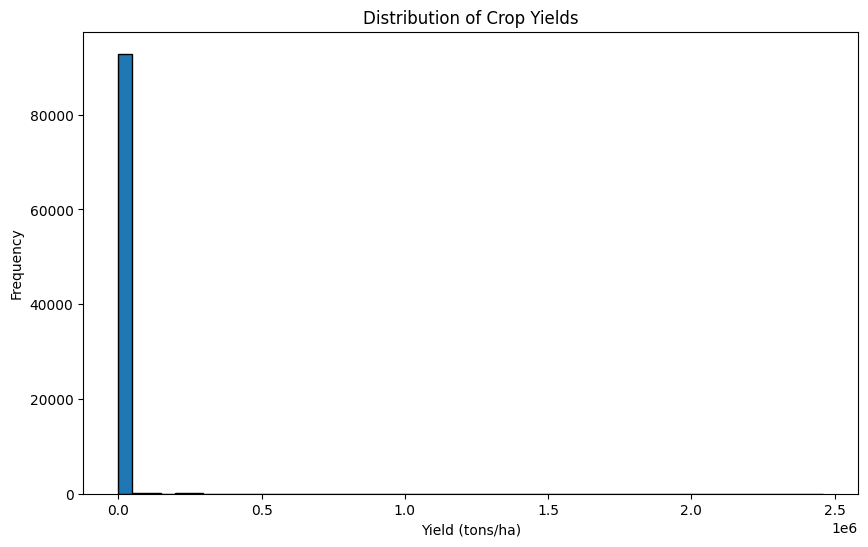

In [4]:
# Calculate yield per hectare
historical_perf['yield_per_ha'] = (
    historical_perf['Volume_Production'] / historical_perf['Area_Planted_Harvested']
)

# Remove invalid yields
historical_perf_clean = historical_perf[
    (historical_perf['yield_per_ha'].notna()) & 
    (historical_perf['yield_per_ha'] != float('inf')) &
    (historical_perf['yield_per_ha'] > 0)
].copy()

print(f"Valid yield records: {len(historical_perf_clean)}")
print(f"\nYield statistics (tons/ha):")
print(historical_perf_clean['yield_per_ha'].describe())

# Plot yield distribution
plt.figure(figsize=(10, 6))
plt.hist(historical_perf_clean['yield_per_ha'], bins=50, edgecolor='black')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Yields')
plt.show()


## Deeper Dive into Yield Patterns

Let's explore the yield data more deeply to identify patterns and insights.

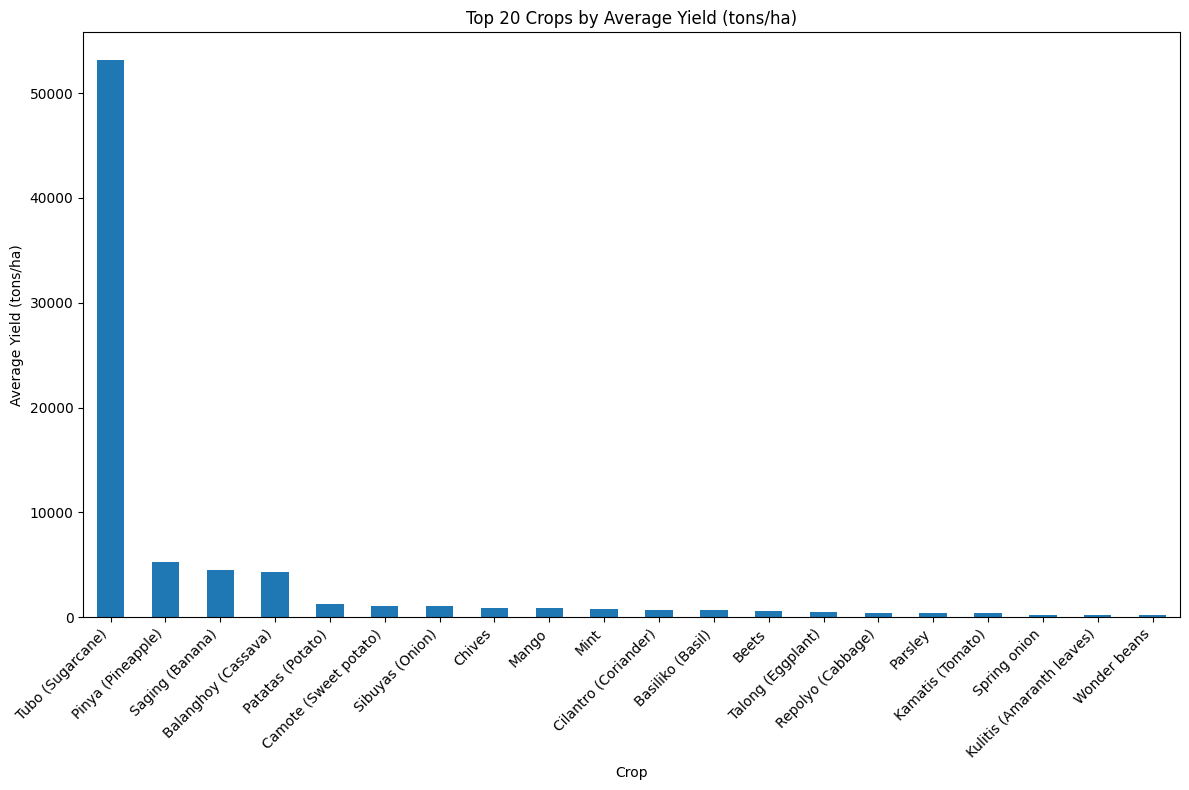

In [72]:
# Top 20 Crops by Average Yield
top_crops = historical_perf_clean.groupby('Crop')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_crops.plot(kind='bar')
plt.title('Top 20 Crops by Average Yield (tons/ha)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

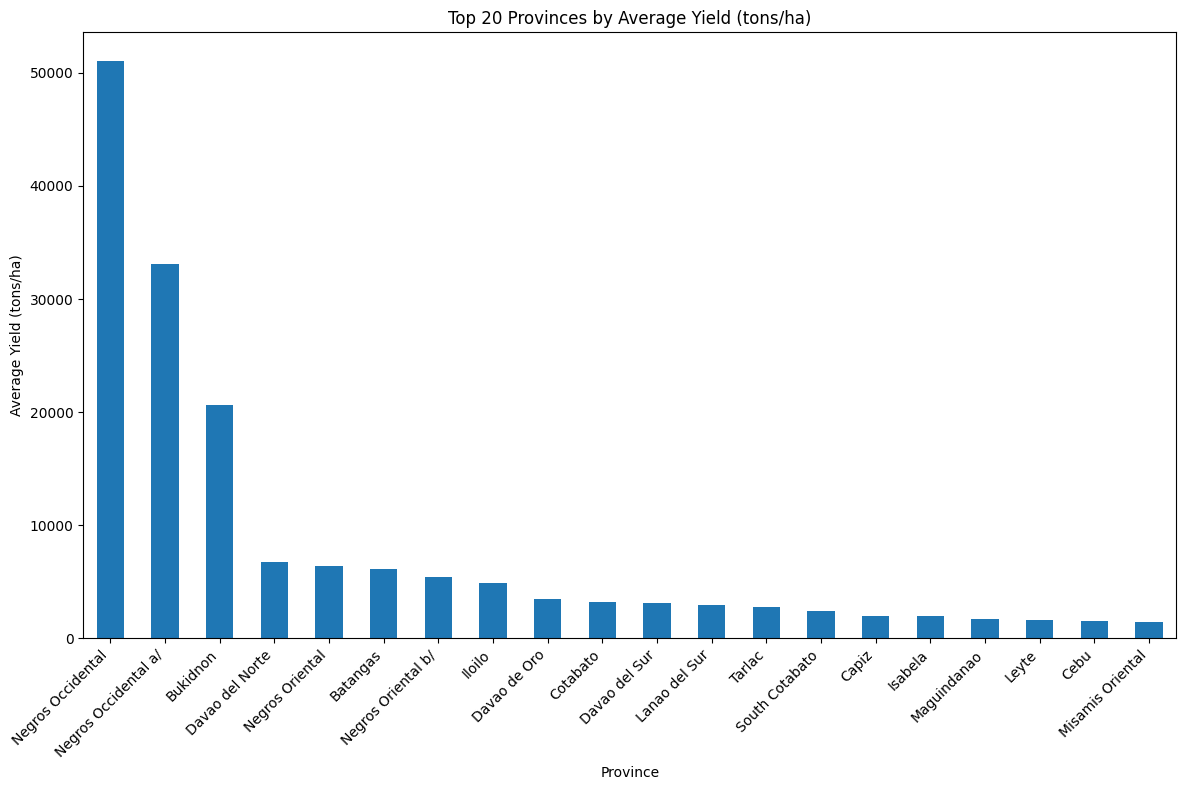

In [71]:
# Top 20 Provinces by Average Yield
top_provinces = historical_perf_clean.groupby('Province')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_provinces.plot(kind='bar')
plt.title('Top 20 Provinces by Average Yield (tons/ha)')
plt.xlabel('Province')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

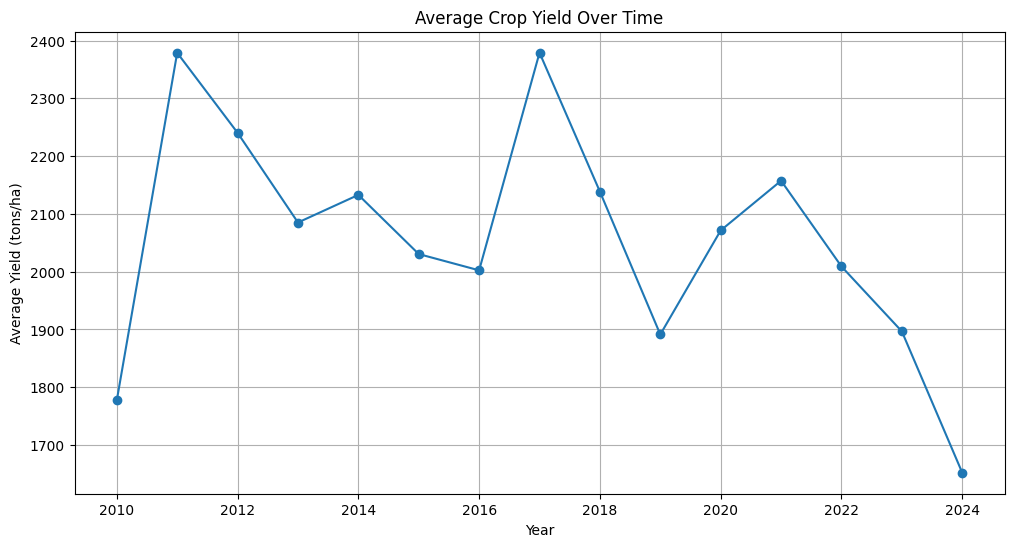

In [7]:
# Yield Trends Over Time
yield_over_time = historical_perf_clean.groupby('Year')['yield_per_ha'].mean()

plt.figure(figsize=(12, 6))
yield_over_time.plot(kind='line', marker='o')
plt.title('Average Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average Yield (tons/ha)')
plt.grid(True)
plt.show()

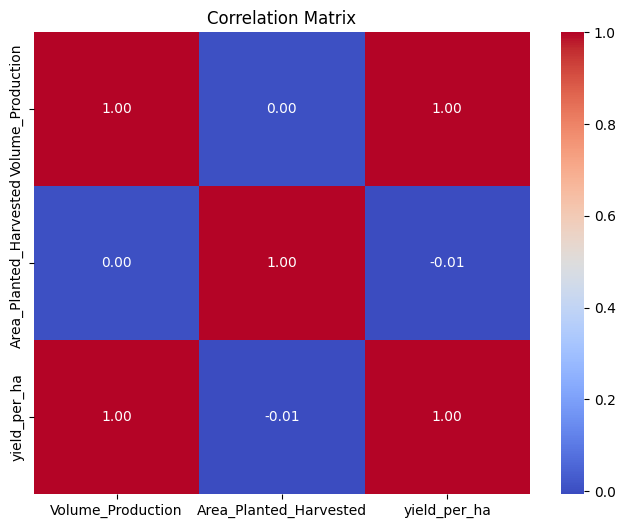

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = historical_perf_clean[['Volume_Production', 'Area_Planted_Harvested', 'yield_per_ha']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

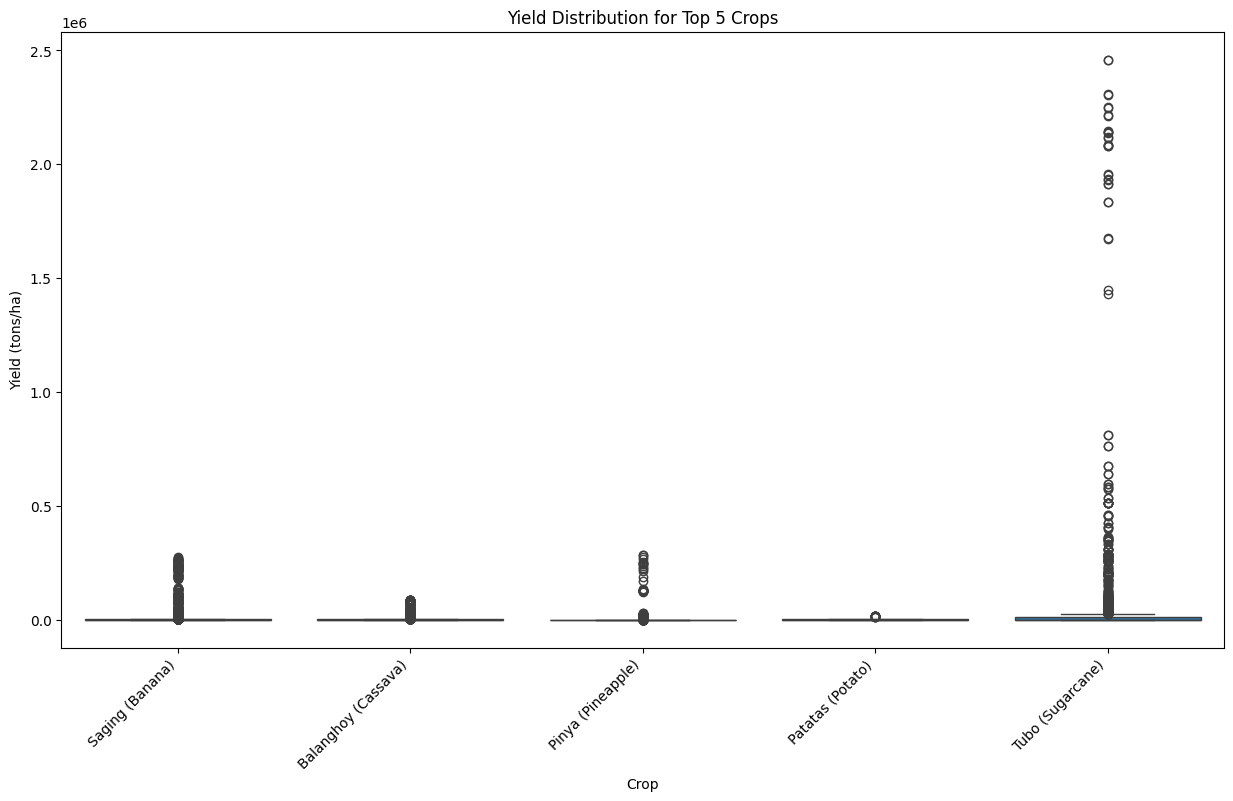

In [9]:
# Box Plots for Top 5 Crops
top_5_crops_list = top_crops.index[:5].tolist()
top_crops_df = historical_perf_clean[historical_perf_clean['Crop'].isin(top_5_crops_list)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Crop', y='yield_per_ha', data=top_crops_df)
plt.title('Yield Distribution for Top 5 Crops')
plt.xlabel('Crop')
plt.ylabel('Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Additional Data Visualizations

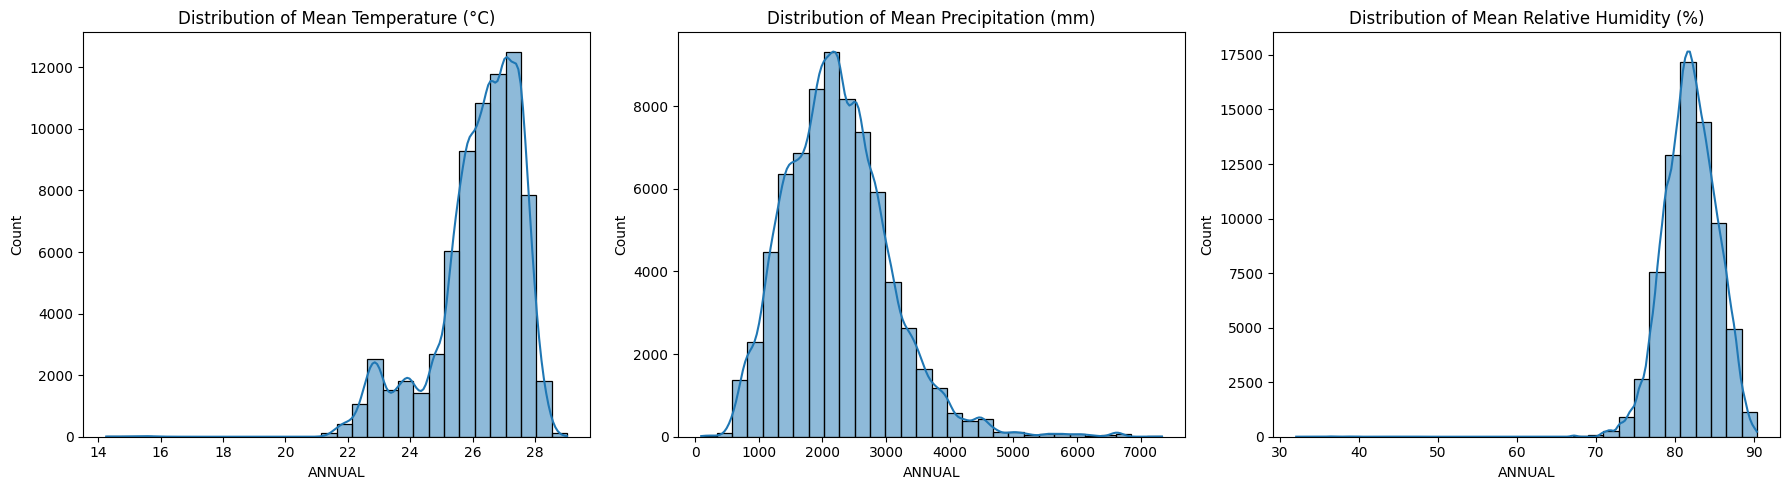

In [12]:
# Distribution of Climate Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean Temperature (annual, PARAMETER == 'T2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'T2M', 'ANNUAL'],
	bins=30, ax=axes[0], kde=True
)
axes[0].set_title('Distribution of Mean Temperature (°C)')

# Mean Precipitation (annual, PARAMETER == 'PRECTOTCORR_SUM')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'PRECTOTCORR_SUM', 'ANNUAL'],
	bins=30, ax=axes[1], kde=True
)
axes[1].set_title('Distribution of Mean Precipitation (mm)')

# Mean Relative Humidity (annual, PARAMETER == 'RH2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'RH2M', 'ANNUAL'],
	bins=30, ax=axes[2], kde=True
)
axes[2].set_title('Distribution of Mean Relative Humidity (%)')

plt.tight_layout()
plt.show()

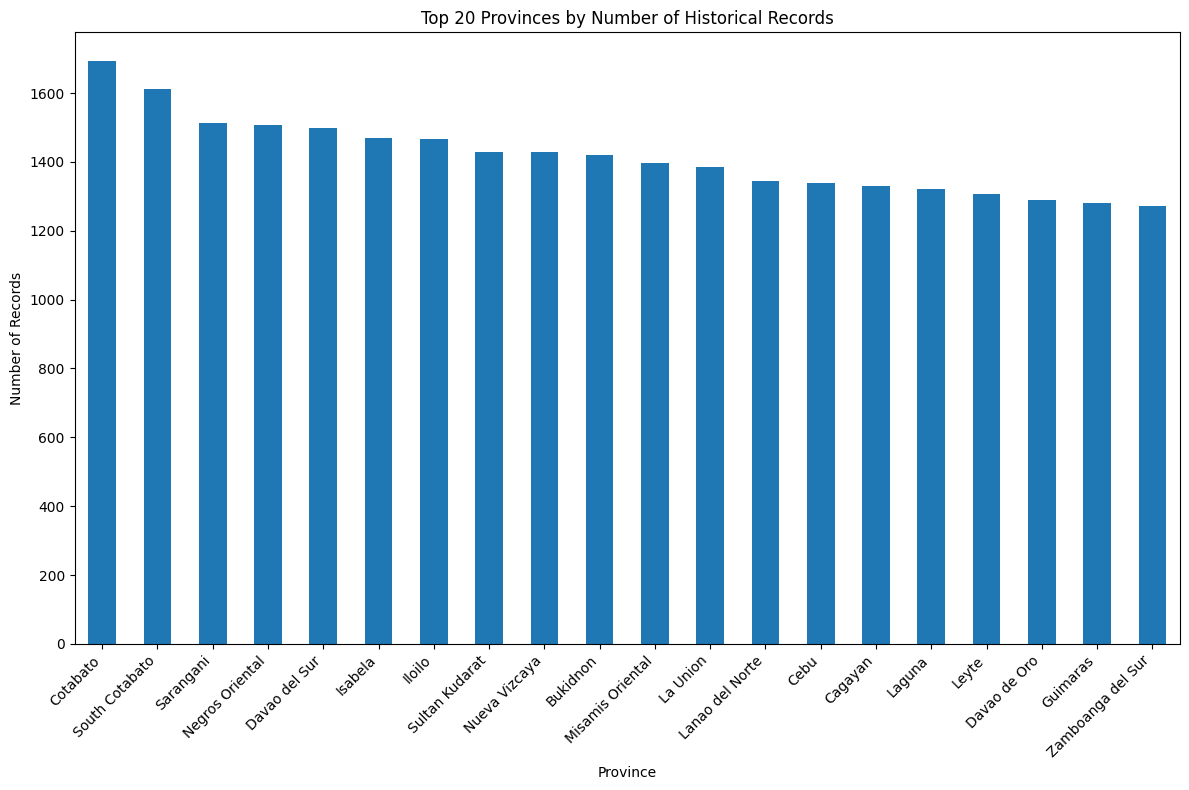

In [13]:
# Number of records per province
plt.figure(figsize=(12, 8))
province_counts = historical_perf_clean['Province'].value_counts().head(20)
province_counts.plot(kind='bar')
plt.title('Top 20 Provinces by Number of Historical Records')
plt.xlabel('Province')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

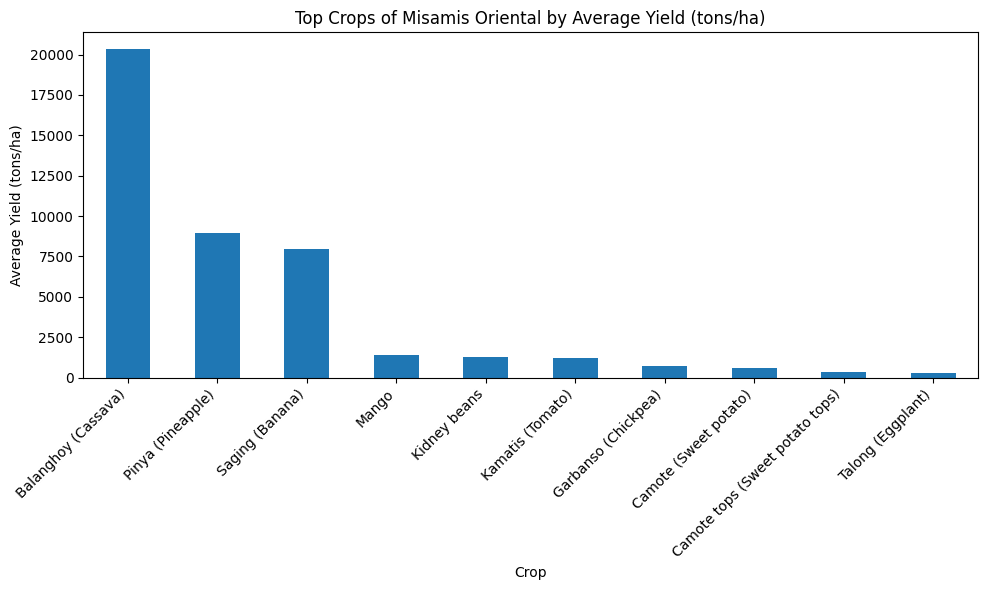

In [73]:
# Show top crops of Misamis Oriental by average yield
misamis_oriental_crops = (
    historical_perf_clean[historical_perf_clean['Province'].str.upper() == 'MISAMIS ORIENTAL']
    .groupby('Crop')['yield_per_ha']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
misamis_oriental_crops.plot(kind='bar')
plt.title('Top Crops of Misamis Oriental by Average Yield (tons/ha)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

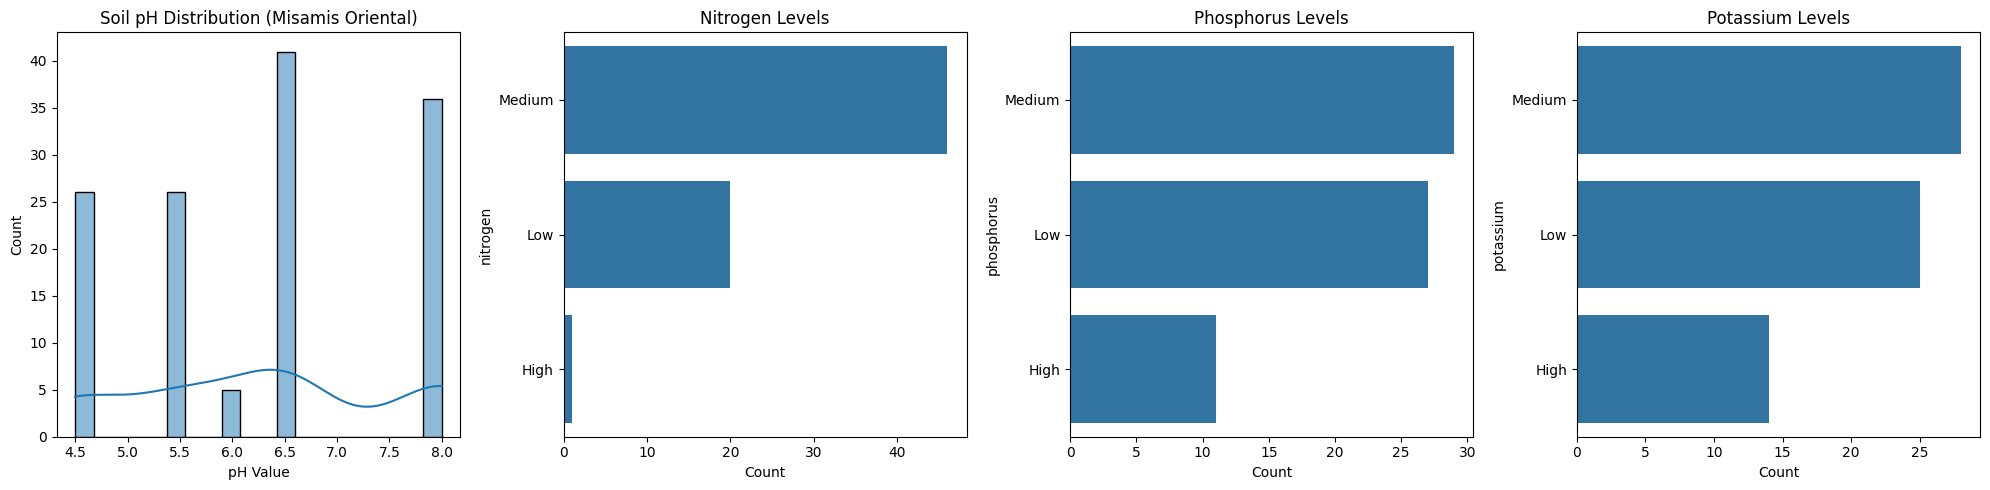

In [74]:
# Filter soil test data for Misamis Oriental
misamis_oriental_soil = soil_test_df[soil_test_df['province'].str.upper() == 'MISAMIS ORIENTAL']

# Plot distributions of pH, nitrogen, phosphorus, and potassium
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# pH distribution
sns.histplot(
    misamis_oriental_soil[['ph_min', 'ph_max']].stack(),
    bins=20, ax=axes[0], kde=True
)
axes[0].set_title('Soil pH Distribution (Misamis Oriental)')
axes[0].set_xlabel('pH Value')

# Nitrogen distribution
sns.countplot(
    y='nitrogen', data=misamis_oriental_soil, order=misamis_oriental_soil['nitrogen'].value_counts().index, ax=axes[1]
)
axes[1].set_title('Nitrogen Levels')
axes[1].set_xlabel('Count')

# Phosphorus distribution
sns.countplot(
    y='phosphorus', data=misamis_oriental_soil, order=misamis_oriental_soil['phosphorus'].value_counts().index, ax=axes[2]
)
axes[2].set_title('Phosphorus Levels')
axes[2].set_xlabel('Count')

# Potassium distribution
sns.countplot(
    y='potassium', data=misamis_oriental_soil, order=misamis_oriental_soil['potassium'].value_counts().index, ax=axes[3]
)
axes[3].set_title('Potassium Levels')
axes[3].set_xlabel('Count')

plt.tight_layout()
plt.show()

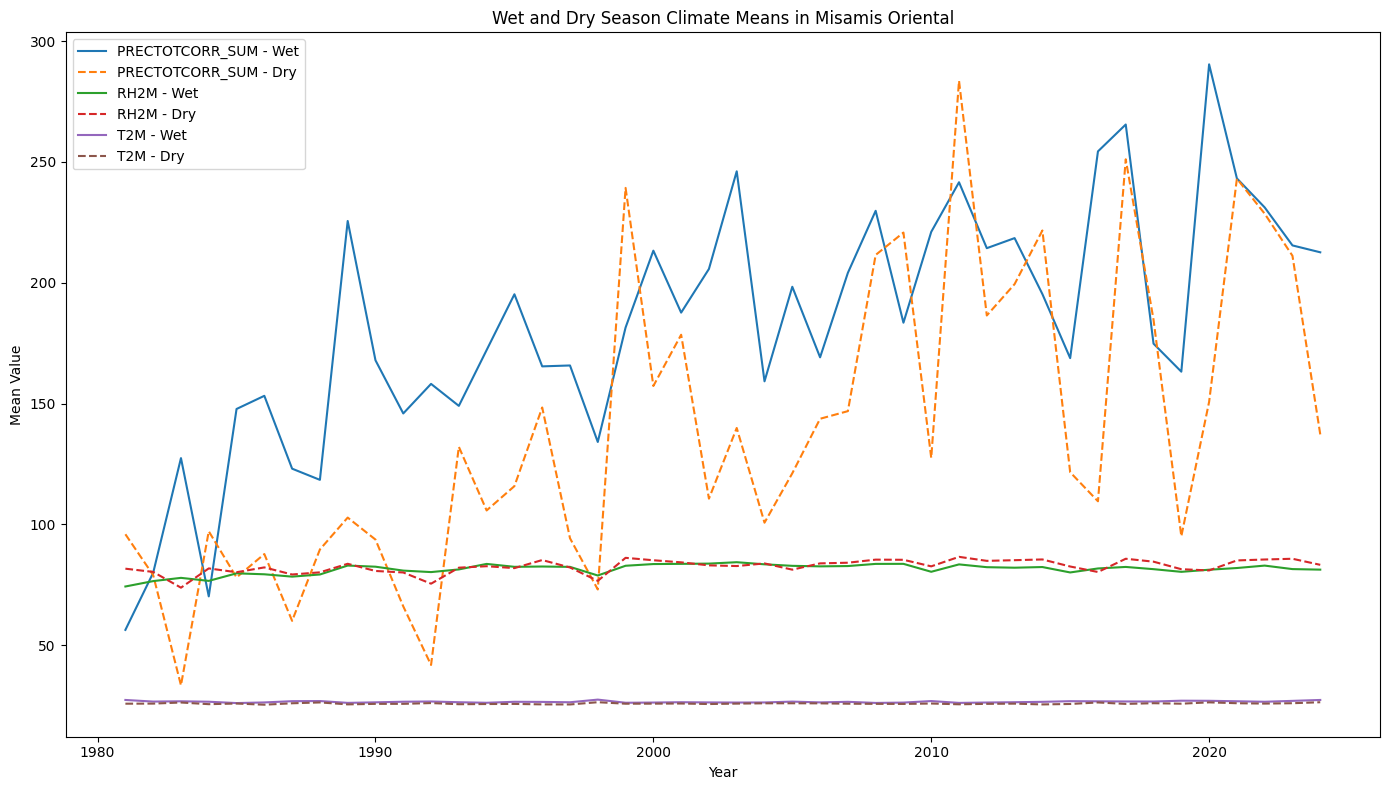

In [76]:
# Pivot for plotting
pivot_df = misamis_oriental_climate.pivot_table(
    index='YEAR', columns='PARAMETER', values=['WET_SEASON', 'DRY_SEASON'], aggfunc='mean'
)

plt.figure(figsize=(14, 8))
for param in misamis_oriental_climate['PARAMETER'].unique():
    plt.plot(
        pivot_df.index, 
        pivot_df['WET_SEASON'][param], 
        label=f'{param} - Wet', 
        linestyle='-'
    )
    plt.plot(
        pivot_df.index, 
        pivot_df['DRY_SEASON'][param], 
        label=f'{param} - Dry', 
        linestyle='--'
    )

plt.title('Wet and Dry Season Climate Means in Misamis Oriental')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.tight_layout()
plt.show()